In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

from phonetics import utils as u
from phonetics import plots as plots

In [4]:
lab_file = '/Users/tomasandrade/Documents/BSC/ICHOIR/datasets/maria_voice/LABELED_FULL/ES_volver_a_los_17.lab'

In [28]:
df_algn = u.df_alignments_from_lab_file(lab_file, add_transitions=False)
df_algn_tr = u.df_alignments_from_lab_file(lab_file, 
                                           add_transitions=True,
                                           pad_seconds=0.0101)

In [29]:
root = '/Users/tomasandrade/Documents/BSC/ICHOIR/study_phonemes_contentvec/data/songs'
feat_paths = glob.glob(f'{root}/feat/*.csv')
lab_paths = glob.glob(f'{root}/lab/*.lab')

In [31]:
df_algn[df_algn['duration'] < 0.02].shape

(23, 6)

In [33]:
df_algn_tr[df_algn_tr['duration'] < 0.02]

,start,end,phone_base,duration,start_idx,end_idx
8,0.829148,0.846142,B,0.016994,41,42
24,1.452277,1.471986,y,0.019709,72,73
52,3.310110,3.328675,w,0.018566,165,166
70,3.986648,3.987995,r,0.001347,199,199
88,5.347282,5.365406,e,0.018124,267,268
...,...,...,...,...,...,...
3138,216.629569,216.633868,e,0.004299,10831,10831
3174,219.341633,219.356812,o,0.015179,10967,10967
3184,219.640948,219.644351,e,0.003403,10982,10982
3194,221.492212,221.497382,t,0.005170,11074,11074


In [44]:
feat_path = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/experiments/maria_v0/feat_768d/feat_768d_layer_12.csv'
df_anotated_12 = pd.read_csv(feat_path, index_col=0)
df_song = df_anotated_12[df_anotated_12['song'] == 'ES_volver_a_los_17']
df_song = df_song.drop(columns=['phone_base', 'song'])

In [53]:
df_annotated = u.add_phone_to_feat_df(df_song, df_algn)
df_annotated_trans = u.add_phone_to_feat_df(df_song, df_algn_tr)

In [73]:
mask1 = df_annotated_trans['duration'] > 0.02
mask2 = df_annotated_trans['phone_base'] != 'transition'

In [74]:
df_clean = df_annotated_trans[mask1 & mask2]

In [76]:
len(df_clean)/len(df_annotated_trans)

0.8505839350985112

In [80]:
feat_path = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/experiments/maria_v6/feat_2d/feat_2d_layer_12.csv'
df_anotated_12 = pd.read_csv(feat_path, index_col=0)

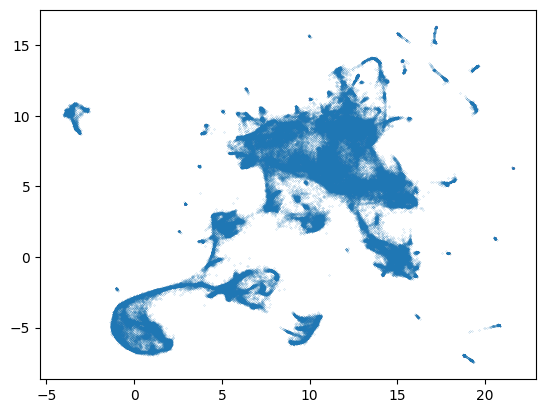

In [ ]:
plt.scatter(df_anotated_12['x'], 
            df_anotated_12['y'], 
            s = 0.01)

In [4]:
root = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/assets/datasets/maria_diff_singer/'
feat_paths = glob.glob(f'{root}/layer_12/*.csv')
lab_paths = glob.glob(f'{root}/lab/*.lab')

In [5]:
df_anotated_all = u.make_anotated_feat_df(feat_paths, 
                                        lab_paths,
                                        add_transitions = True,
                                        pad_seconds = 0.0101,
                                        remove_short_phones = False)

In [12]:
umap2 = u.train_umap(
        df_anotated_all,
        exclude_phones = ['SP'],
        n_components=2, 
        n_neighbors=100, 
        min_dist=0.1,
        metric = 'cosine',
        normalize_vectors=True,
        save_model = False,
        folder = None)

Training UMAP with parameters n_components : 2, n_neighbors 100, min_dist : 0.1


/Users/tomasandrade/miniconda3/envs/ling_env/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [13]:
df_proj_anotated = u.make_proj_anotated_feat_df(df_anotated_all, 
                                                umap2,
                                                save_df = False,
                                                folder = None)

Applying dimensional reduction
Reduced to 2 dimensions


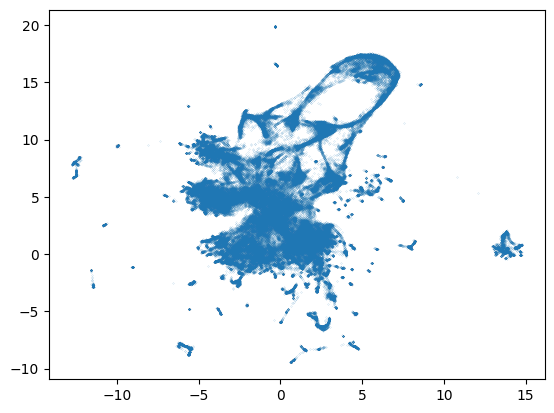

In [9]:
df_proj_anotated = df_proj_anotated[df_proj_anotated['phone_base'] != 'SP']
# df = df_proj_anotated[df_proj_anotated['phone_base'] == 'transition']
# plt.scatter(df['x'], 
#             df['y'], 
#             s = 0.01,
#             color = 'red')

df = df_proj_anotated[df_proj_anotated['phone_base'] != 'transition']

plt.scatter(df['x'], 
            df['y'], 
            s = 0.01,
            alpha=0.8)

In [10]:
unique_phones = list(df_proj_anotated[~df_proj_anotated['phone_base'].isin(['SP'])]['phone_base'].value_counts().keys())

Making a 2d plot


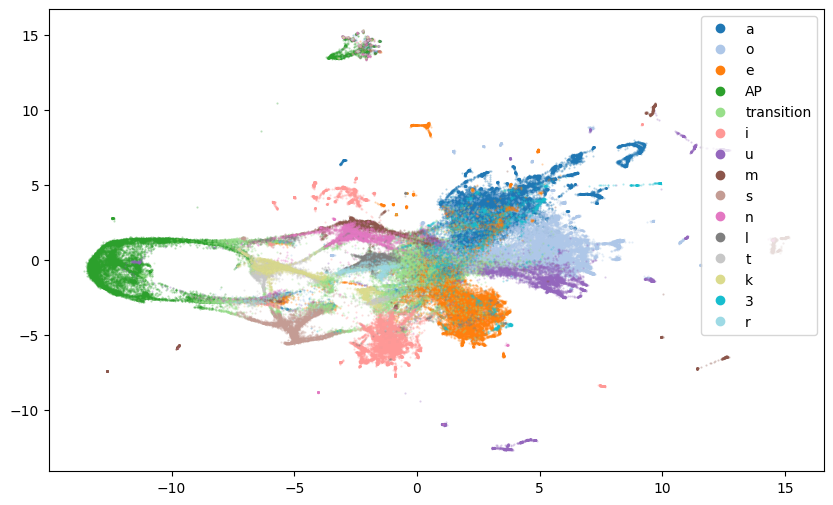

In [11]:
plots.make_tagged_LS_plot(df_proj_anotated,
                phones = unique_phones[0:15],
                figsize = (10, 6),
                alpha = 0.3, 
                s = 0.3, 
                align_head=True,
                show_global = False,
                add_legend = True,
                label_detail = False,
                save_fig = False,
                ax = None);

In [72]:
df = df_proj_anotated[df_proj_anotated['phone_base'] != 'transition']

Making a 2d plot


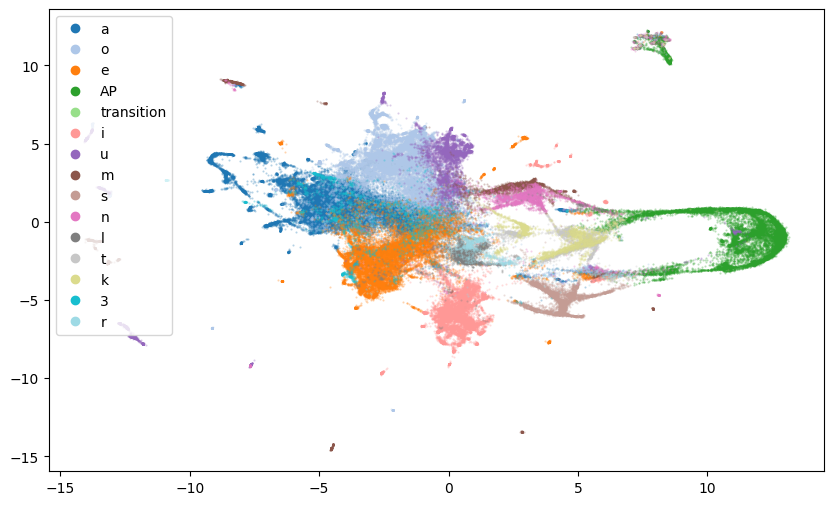

In [73]:
plots.make_tagged_LS_plot(df,
                phones = unique_phones[0:15],
                figsize = (10, 6),
                alpha = 0.3, 
                s = 0.3, 
                align_head=True,
                show_global = False,
                add_legend = True,
                label_detail = False,
                save_fig = False,
                ax = None);

In [76]:
df_grouped, ph_group = u.group_vowels_consonants_ap(df)

vowels: ['a', 'e', 'i', 'o', 'u', '3', 'w', '0', 'y']
aspirations: ['AP']
Short pause: SP


Making a 2d plot


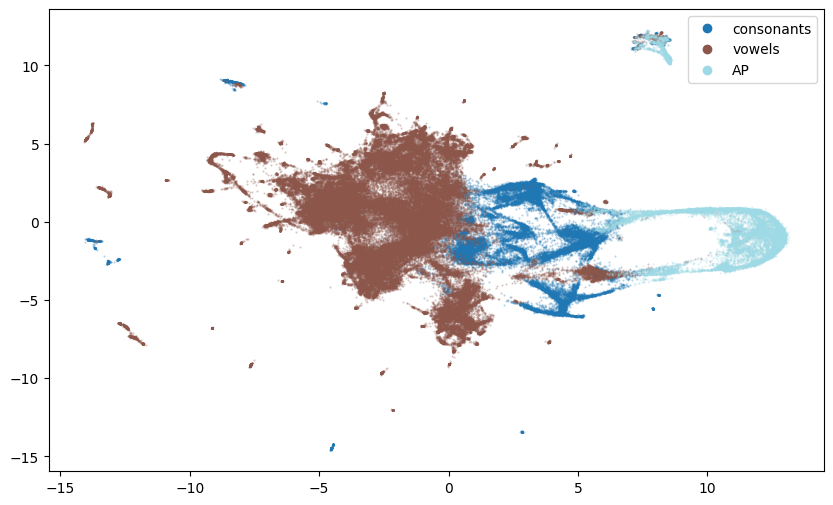

In [78]:
plots.make_tagged_LS_plot(df_grouped,
                phones = ph_group,
                figsize = (10, 6),
                alpha = 0.3, 
                s = 0.3, 
                align_head=True,
                show_global = False,
                add_legend = True,
                label_detail = False,
                save_fig = False,
                ax = None);

In [79]:
from sklearn.metrics import silhouette_samples

In [80]:
X = df_grouped[['x', 'y']].values
y = df_grouped['group'].values

sample_silhouette_values = silhouette_samples(X, y)

(array([1.2700e+02, 2.7000e+01, 2.9080e+03, 3.5160e+03, 1.0332e+04,
        8.1550e+03, 2.5547e+04, 4.7665e+04, 3.0348e+04, 9.6440e+03]),
 array([-0.79791516, -0.64774221, -0.49756923, -0.34739625, -0.19722329,
        -0.04705033,  0.10312264,  0.2532956 ,  0.40346858,  0.55364156,
         0.70381451]),
 <BarContainer object of 10 artists>)

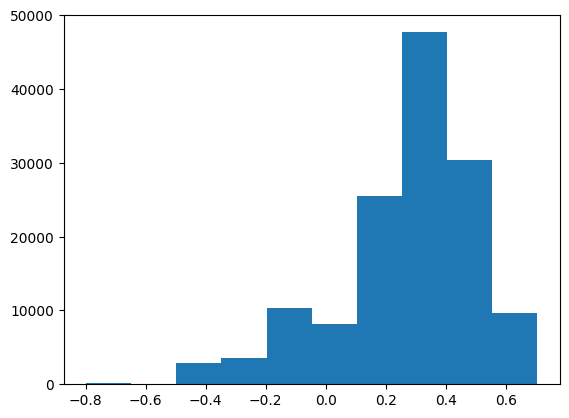

In [81]:
plt.hist(sample_silhouette_values)

In [82]:
sample_silhouette_values.mean()

0.2702293